<a href="https://colab.research.google.com/github/ShivaniH2020/Repository/blob/main/Assignment4Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Roll Number: 20MCI0001")

Roll Number: 20MCI0001


In [55]:
print("https://github.com/ShivaniH2020/Repository")

https://github.com/ShivaniH2020/Repository


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 2
non_trainable_weights: 0


In [4]:
layer = keras.layers.BatchNormalization()
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 4
trainable_weights: 2
non_trainable_weights: 2


In [5]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights
layer.trainable = False  # Freeze the layer

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 0
non_trainable_weights: 2


In [6]:
# Make a model with 2 layers
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")
model = keras.Sequential([keras.Input(shape=(3,)), layer1, layer2])

# Freeze the first layer
layer1.trainable = False

# Keep a copy of the weights of layer1 for later reference
initial_layer1_weights_values = layer1.get_weights()

# Train the model
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))

# Check that the weights of layer1 have not changed during training
final_layer1_weights_values = layer1.get_weights()
np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)
np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)

1/1 [==============================] - 3s 3s/step - loss: 0.0373


In [7]:
inner_model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(3, activation="relu"),
    ]
)

model = keras.Sequential(
    [keras.Input(shape=(3,)), inner_model, keras.layers.Dense(3, activation="sigmoid"),]
)

model.trainable = False  # Freeze the outer model

assert inner_model.trainable == False  # All layers in `model` are now frozen
assert inner_model.layers[0].trainable == False  # `trainable` is propagated recursively

In [8]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

83689472/83683744 [==============================] - 1s 0us/step


In [10]:
base_model.trainable = False

In [11]:
inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [18]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
#model.fit(new_dataset, epochs=20, callbacks=..., validation_data=...)

In [19]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2021-04-16 13:19:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.240, 172.217.8.16, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  88.8MB/s    in 0.7s    

2021-04-16 13:19:57 (88.8 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
! unzip cats_and_dogs_filtered.zip

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
trdata = ImageDataGenerator(vertical_flip=True,rotation_range=90)
new_traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator(vertical_flip=True,rotation_range=90)
new_testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [30]:
hist = model.fit_generator(steps_per_epoch=10,generator=new_traindata, validation_data= new_testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 42s 1s/step - loss: 3.0360 - binary_accuracy: 0.5000 - val_loss: 2.3628 - val_binary_accuracy: 0.5000


Epoch 2/10
10/10 [==============================] - 9s 939ms/step - loss: 2.0822 - binary_accuracy: 0.5000 - val_loss: 2.1505 - val_binary_accuracy: 0.5000


Epoch 3/10
10/10 [==============================] - 9s 938ms/step - loss: 1.9970 - binary_accuracy: 0.5000 - val_loss: 1.6818 - val_binary_accuracy: 0.5000


Epoch 4/10
10/10 [==============================] - 9s 931ms/step - loss: 1.6155 - binary_accuracy: 0.5000 - val_loss: 1.3881 - val_binary_accuracy: 0.5000


Epoch 5/10
10/10 [==============================] - 9s 924ms/step - loss: 1.4545 - binary_accuracy: 0.5000 - val_loss: 1.3232 - val_binary_accuracy: 0.5000


Epoch 6/10
10/10 [==============================] - 9s 923ms/step - loss: 1.4583 - binary_accuracy: 0.5000 - val_loss: 1.4907 - val_binary_accuracy: 0.5000


Epoch 7/10
10/10 [==============================] - 9s 936ms/step - loss: 1.4203 - binary_accuracy: 0.5000 - val_loss: 1.2638 - val_binary_accuracy: 0.5000


Epoch 8/10
10/10 [==============================] - 9s 921ms/step - loss: 1.3266 - binary_accuracy: 0.5000 - val_loss: 1.3123 - val_binary_accuracy: 0.5000


Epoch 9/10
10/10 [==============================] - 9s 922ms/step - loss: 1.1770 - binary_accuracy: 0.5000 - val_loss: 1.2956 - val_binary_accuracy: 0.5000


Epoch 10/10
10/10 [==============================] - 9s 939ms/step - loss: 1.3101 - binary_accuracy: 0.5000 - val_loss: 1.1560 - val_binary_accuracy: 0.5000


In [17]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

NameError: ignored

In [32]:
# Unfreeze the base model
base_model.trainable = True
 
# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
 
# Train end-to-end. Be careful to stop before you overfit!
model.fit(new_dataset, epochs=10, callbacks=[checkpoint,early], validation_data= new_testdata)

Epoch 1/10
63/63 [==============================] - 60s 866ms/step - loss: 1.1066 - binary_accuracy: 0.5000 - val_loss: 0.7191 - val_binary_accuracy: 0.5000


Epoch 2/10
63/63 [==============================] - 52s 827ms/step - loss: 0.7077 - binary_accuracy: 0.5000 - val_loss: 0.6963 - val_binary_accuracy: 0.5000


Epoch 3/10
63/63 [==============================] - 52s 824ms/step - loss: 0.6954 - binary_accuracy: 0.5000 - val_loss: 0.6943 - val_binary_accuracy: 0.5000


Epoch 4/10
63/63 [==============================] - 52s 821ms/step - loss: 0.6940 - binary_accuracy: 0.5000 - val_loss: 0.6937 - val_binary_accuracy: 0.5000


Epoch 5/10
63/63 [==============================] - 52s 822ms/step - loss: 0.6938 - binary_accuracy: 0.5000 - val_loss: 0.6934 - val_binary_accuracy: 0.5000


Epoch 6/10
63/63 [==============================] - 52s 820ms/step - loss: 0.6934 - binary_accuracy: 0.5000 - val_loss: 0.6934 - val_binary_accuracy: 0.5000


Epoch 7/10
63/63 [==============================] - 52s 825ms/step - loss: 0.6933 - binary_accuracy: 0.5000 - val_loss: 0.6934 - val_binary_accuracy: 0.5000


Epoch 8/10
63/63 [==============================] - 52s 825ms/step - loss: 0.6934 - binary_accuracy: 0.5000 - val_loss: 0.6934 - val_binary_accuracy: 0.5000


Epoch 9/10
63/63 [==============================] - 52s 824ms/step - loss: 0.6933 - binary_accuracy: 0.5000 - val_loss: 0.6935 - val_binary_accuracy: 0.5000


Epoch 10/10
63/63 [==============================] - 52s 825ms/step - loss: 0.6933 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000


In [ ]:
# Create base model
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
# Freeze base model
base_model.trainable = False
 
# Create new model on top.
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
print("targets")
print(targets)

print("predictions")
print(predictions)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam()
 
# Iterate over the batches of a dataset.
for inputs, targets in new_dataset:
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        # Forward pass.
        predictions = model(inputs)
        # Compute the loss value for this batch.
        loss_value = loss_fn(targets, predictions)
 
    # Get gradients of loss wrt the *trainable* weights.
   # gradients = tape.gradient(loss_value, model.trainable_weights)
    # Update the weights of the model.
   # optimizer.apply_gradients(zip(gradients, model.trainable_weights))

In [46]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print(
    "Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds)
)
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


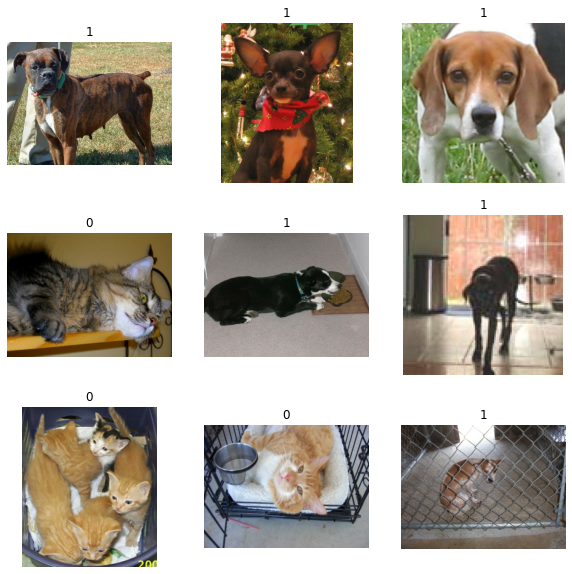

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [48]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [49]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [50]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

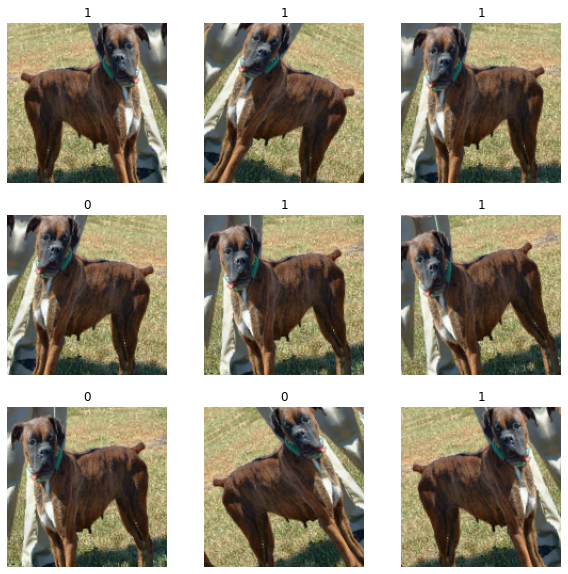

In [51]:
import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [52]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(x)
norm_layer.set_weights([mean, var])

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 150, 150, 3)       7         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_11  (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 204

In [53]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/20
291/291 [==============================] - 28s 86ms/step - loss: 0.2408 - binary_accuracy: 0.8886 - val_loss: 0.0800 - val_binary_accuracy: 0.9690
Epoch 2/20
291/291 [==============================] - 23s 78ms/step - loss: 0.1213 - binary_accuracy: 0.9482 - val_loss: 0.0753 - val_binary_accuracy: 0.9712
Epoch 3/20
291/291 [==============================] - 22s 76ms/step - loss: 0.1142 - binary_accuracy: 0.9501 - val_loss: 0.0736 - val_binary_accuracy: 0.9716
Epoch 4/20
291/291 [==============================] - 22s 76ms/step - loss: 0.1139 - binary_accuracy: 0.9523 - val_loss: 0.0701 - val_binary_accuracy: 0.9725
Epoch 5/20
291/291 [==============================] - 22s 76ms/step - loss: 0.0995 - binary_accuracy: 0.9602 - val_loss: 0.0703 - val_binary_accuracy: 0.9712
Epoch 6/20
291/291 [==============================] - 22s 77ms/step - loss: 0.1041 - binary_accuracy: 0.9568 - val_loss: 0.0692 - val_binary_accuracy: 0.9733
Epoch 7/20
291/291 [==============================] 

In [54]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 150, 150, 3)       7         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_11  (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 204